- https://www.transfermarkt.com/
- 사이트에서 원하는 정보를 크롤링하고
- 판다스를 이용하여 데이터프레임 생성후 가공후
- 시각화(그래프) 하기


                      nation                 team   won age  name  area
index                                                                  
Kylian Mbappé         France  Paris Saint-Germain  2204  22   프랑스    유럽
Erling Haaland        Norway    Borussia Dortmund  1791  21  노르웨이    유럽
Harry Kane           England    Tottenham Hotspur  1653  28    영국    유럽
Jadon Sancho         England    Manchester United  1377  21    영국    유럽
Mohamed Salah          Egypt         Liverpool FC  1377  29   이집트  아프리카
...                      ...                  ...   ...  ..   ...   ...
Youri Tielemans      Belgium       Leicester City   757  24   벨기에    유럽
N'Golo Kanté          France           Chelsea FC   757  30   프랑스    유럽
João Cancelo        Portugal      Manchester City   757  27  포르투갈    유럽
Virgil van Dijk  Netherlands         Liverpool FC   757  30  네덜란드    유럽
Marco Verratti         Italy  Paris Saint-Germain   757  28  이탈리아    유럽

[75 rows x 6 columns]


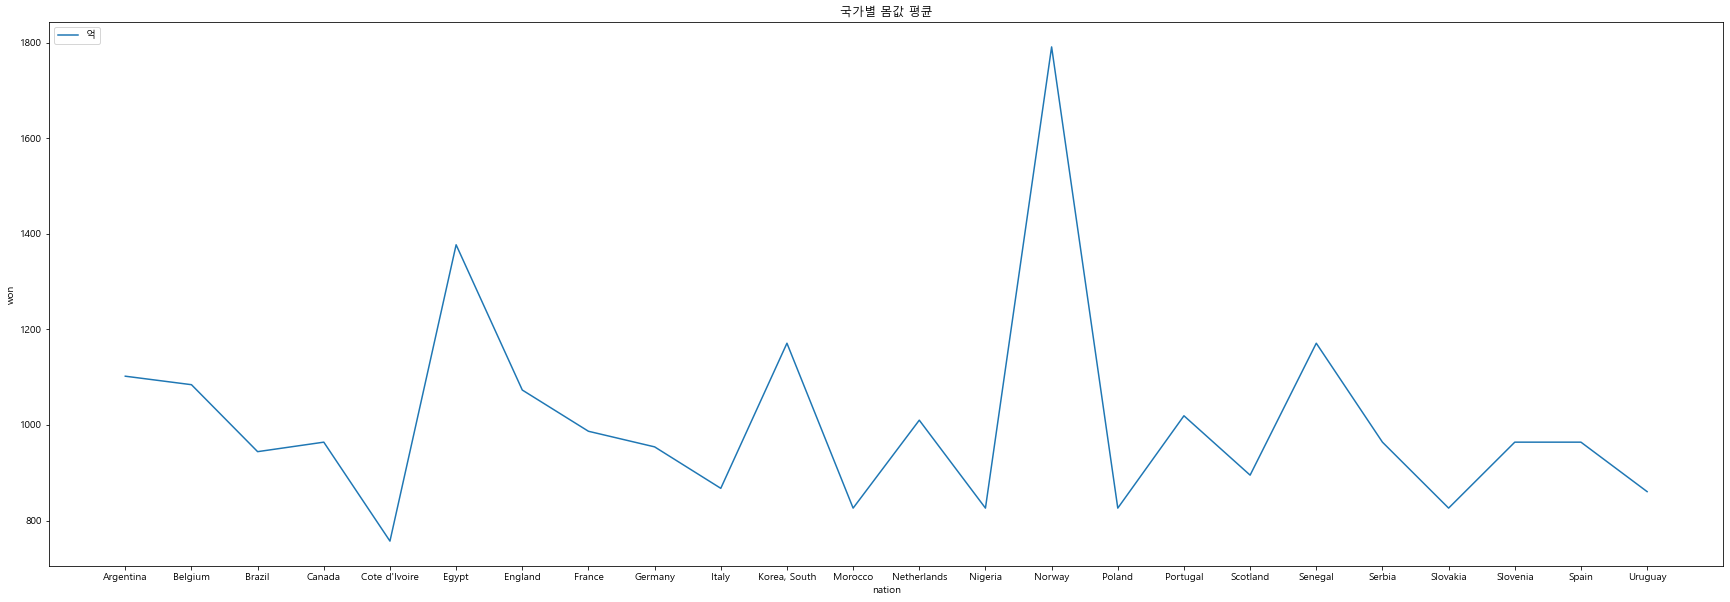

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


url = 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bk01&qvt=0&query=%EC%9C%A0%EB%9F%BD%EC%97%B0%ED%95%A9%ED%99%98%EC%9C%A8'
res1 = requests.get(url)
soup1 = BeautifulSoup(res1.text, 'lxml')

exchange = float(soup1.find('span', 'spt_con up').strong.get_text().replace(',', ''))

player_dict = dict()

for i in range(1, 4):
    url = f'https://www.transfermarkt.com/marktwertetop/wertvollstespieler?ajax=yw1&page={i}'
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36'}
    res = requests.get(url, headers=headers)

    soup = BeautifulSoup(res.text, 'lxml')

    players = soup.find_all('tr', class_=['odd', 'even'])


    for player in players:
        nations = player.find_all('td')
        nation = nations[6].img['alt']
        age = nations[5].get_text()
        team = nations[7].img['alt']
        name = player.find('td', class_='hauptlink')
        
        
        price = str(int(player.b.get_text().strip('€m').replace('.', ''))*exchange*10000)
        
        if len(price) == 14:
            player_dict[name.get_text()] = [nation, team, int(price[:4]), age]
            
        else:
            player_dict[name.get_text()] = [nation, team, int(price[:3]), age]


columns = ['nation', 'team', 'won', 'age']
df = pd.DataFrame(player_dict.values(), index=player_dict.keys(), columns=columns)
group_df = round(df.groupby('nation').mean(), 2)
df2 = pd.read_csv('data26/nation_final.csv')
df2.rename(columns={'eng':'nation'}, inplace=True)
df3 = df.reset_index().merge(df2, how='left').set_index('index')
group_df3 = round(df3.groupby(['nation', 'area']).mean(), 2)
print(df3)

class Visualizer:
    @staticmethod
    def visualize_nation(df, x_label: str, y_label: str):
        plt.figure(figsize=(30, 10))
        plt.plot(df)
        plt.title('국가별 몸값 평큔')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend('억', fontsize=10, loc=2)
        plt.show()
        
# 폰트설정
plt.rcParams['font.family']='Malgun Gothic'

# - 부호가 깨질때
plt.rcParams['axes.unicode_minus'] = False

# 캔버스 사이즈 설정
plt.rcParams["figure.figsize"] = (9, 6)

visualizer = Visualizer()
visualizer.visualize_nation(group_df, 'nation', 'won')